# Homework 1-Exercise 2 

In [ ]:
'''
Name：Martin ECHAVARRIA GALINDO
Department: Chemical and Biological Engineering
Program: PhD in Bioengineering
Student ID: 21000651
'''

In [ ]:
import pandas as pd
import numpy as np

##  A) Input a few cities (no less than 7) in your favorite, and collect the pairwise air traveling distances shown on the website in to a matrix D;

In [85]:
D=pd.read_csv('City Distance.csv', index_col=0)
D=D.iloc[:10, :]
print(D)

D=D.to_numpy()
D= D.astype('float')

             Los Angeles  Seattle    Miami   Austin  Chicago  New York  \
Los Angeles         0.00  1544.95  3757.88  1971.26  2803.81   3935.61   
Seattle          1544.95     0.00  4394.61  2847.46  2788.28   3865.33   
Miami            3757.88  4394.61     0.00  1791.57  1916.42   1756.62   
Austin           1971.26  2847.46  1791.57     0.00  1577.07   2431.94   
Chicago          2803.81  2788.28  1916.42  1577.07     0.00   1144.42   
New York         3935.61  3865.33  1756.62  2431.94  1144.42      0.00   
Washington       3693.57  3738.24  1488.44  2119.37   957.58    327.43   
Atlanta          3109.99  3505.25   974.50  1316.33   948.07   1200.52   
Las Vegas         367.47  1402.32  3504.17  1742.94  2448.02   3584.86   
Denver           1335.88  1640.89  2774.87  1241.64  1477.09   2618.51   

             Washington  Atlanta Las Vegas   Denver  
Los Angeles     3693.57  3109.99    367.47  1335.88  
Seattle         3738.24  3505.25   1402.32  1640.89  
Miami           1488.44

## B) Make your own codes of Multidimensional Scaling algorithm for D 

In [94]:
def centering_matrix(n):
    I = np.identity(n)
    ones = np.ones((n, n)) / n
    return I - ones

def mds(data):
    n = len(data)
    C = centering_matrix(n)
    B = -0.5 * np.dot(C, np.dot(data**2, C.T))
    eigvals, eigvecs = np.linalg.eigh(B)
    idx = np.argsort(eigvals)[::-1]
    eigval_selected = eigvals[idx][:2]
    eigvecs = eigvecs[:, idx][:, :2]

    coords = np.dot(np.sqrt(np.diag(eigval_selected)),eigvecs.T)
    return coords, eigvals

coords,eigvals=mds(D)

print(coords.shape)

(2, 10)


## C) Plot the normalized eigenvalues λi/(Piλi) in a descending order of magnitudes, analyze your observations 

The following are the obtained eigenvalues
[ 2.21387206e+07  4.46450384e+06  2.39823985e+04  3.35968436e+02
  5.28517450e+00  1.11060062e+00 -2.46795804e-10 -1.51921234e+02
 -9.15334312e+03 -9.36796547e+04]


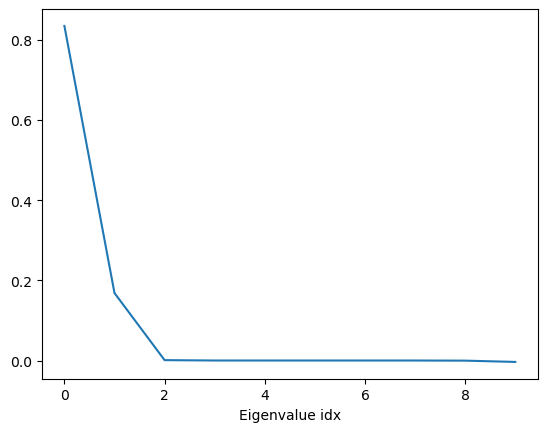

In [109]:
print('The following are the obtained eigenvalues')
print(eigvals[::-1])
sum_eigvals=np.sum(eigvals)
eigvals_norm=eigvals/sum_eigvals
plt.plot(eigvals_norm[::-1])
plt.xlabel('Eigenvalue idx')
plt.show()


In [ ]:
'''
In the analysis of the obtained eigenvalues, it was observed that several negative eigenvalues were present. 
This occurrence can be attributed to the fact that the distances used in this exercise are non-Euclidean. 
onsequently, no model can perfectly represent them, meaning that no configuration of points in a 2D Euclidean 
space can reproduce the distance matrix (D) precisely. Nevertheless, the eigenvalue plot reveals that the majority 
of the variance can be captured by the first two eigenvalues. This observation suggests that a two-dimensional 
representation can still provide a reasonably accurate approximation of the original data.
'''

## D) Make a scatter plot of those cities using top 2 or 3 eigenvectors, and analyze your observations

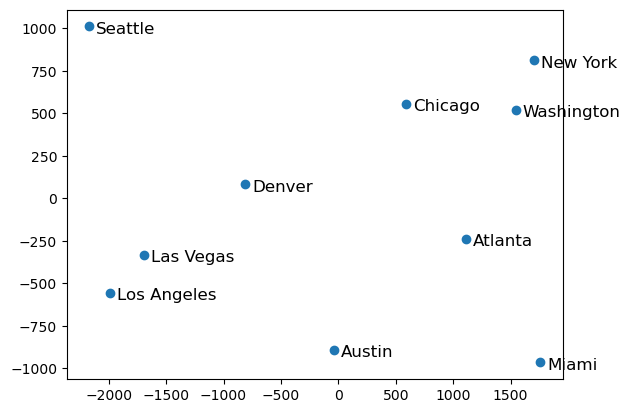

In [101]:
import matplotlib.pyplot as plt


plt.scatter(coords[0, :], -coords[1,:])


labels=['Los Angeles', 'Seattle','Miami','Austin','Chicago','New York','Washington','Atlanta','Las Vegas','Denver']

for i in range(10):
    plt.annotate(labels[i], (coords[0,i], -coords[1,i]), fontsize=12, xytext=(5, -5), textcoords='offset points')


In [ ]:
'''
Upon visual examination of the resulting plot, it is evident that the Multidimensional Scaling (MDS) algorithm 
employed in this exercise achieved a moderate level of success in representing the distances between the tested 
cities within a two-dimensional space. However, a comparison of the obtained results with the actual geographical 
ata reveals some discrepancies in the distances. This observation highlights the inherent challenges associated 
with transforming data originating from a non-Euclidean space into a 2D Euclidean space. Despite these limitations, 
the MDS algorithm still provides a useful approximation for visualizing and understanding the relationships Between 
the data points.
'''